In [329]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe
from sklearn import metrics 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, f1_score, precision_score, recall_score, precision_recall_curve, mean_squared_error, make_scorer

In [2]:
data = pd.read_csv('Dataset/WW2122_FinalMerge2.csv')

In [3]:
print('Number of rows :', data.shape[0])
print('Number of columns :', data.shape[1])

Number of rows : 824986
Number of columns : 155


In [294]:
df = data.copy()

In [295]:
df = df.iloc[:,38:]

In [378]:
wifi_tx_freq_test = df.filter(regex='(DEVICE|WIFI_RX_CURRENT|WIFI_TX_CURRENT|WIFI_TX_FREQ_ACCURACY_TEST)')

### Correlation Cal

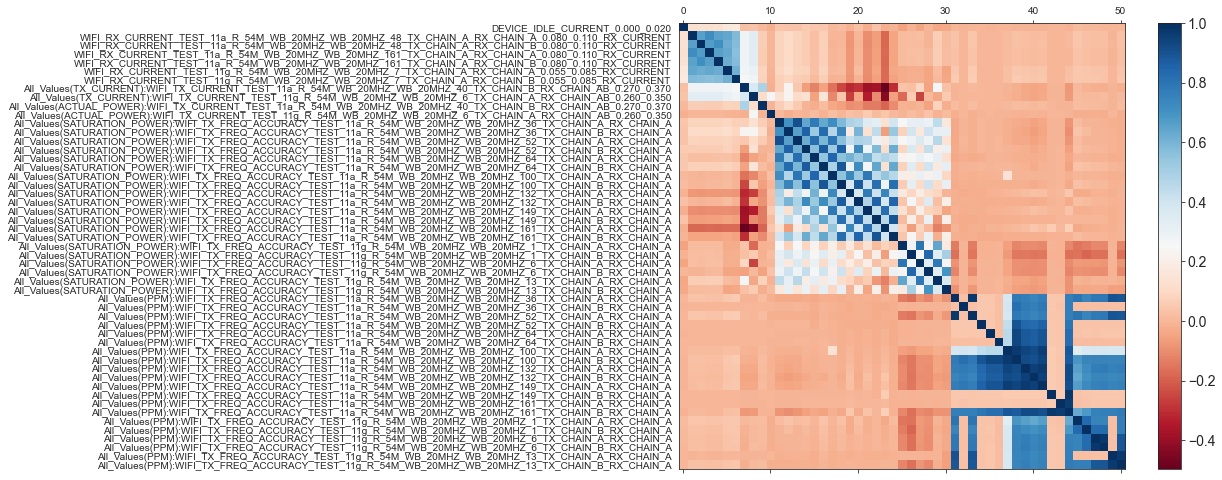

In [387]:
f = plt.figure(figsize=(12,8))
plt.matshow(wifi_tx_freq_test.corr(), fignum=f.number, cmap='RdBu')
plt.yticks(range(wifi_tx_freq_test.select_dtypes(['number']).shape[1]), wifi_tx_freq_test.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

#### Band: 11g - **TX_CHAIN_A**, 
#### **Channel:1** (1st 11g, 1st TX_FREQ Test Case) & **Channel:6** (3rd 11g, 3rd TX_FREQ Test Case)
SATURATION_POWER,PPM checked

In [356]:
wifi_tx_freq_test.corr()['All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_A_RX_CHAIN_A'].sort_values().tail()
# Remarks: Checking PPM channel 1 TX_CHAIN_A (1st 11g), high correlation features:

All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_13_TX_CHAIN_B_RX_CHAIN_A    0.763410
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_36_TX_CHAIN_A_RX_CHAIN_A    0.798006
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_52_TX_CHAIN_A_RX_CHAIN_A    0.799001
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_B_RX_CHAIN_A     0.835060
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_A_RX_CHAIN_A     1.000000
Name: All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_A_RX_CHAIN_A, dtype: float64

In [216]:
# Saturation Power
wifi_tx_freq_test.corr()['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_A_RX_CHAIN_A'].sort_values().tail()
# Remarks: Checking SATURATION_POWER channel 1 TX_CHAIN_A (1st 11g), high correlation features:
# SATURATION_POWER channel 6 TX_CHAIN_A (PPM checked, will be used as target)
# SATURATION_POWER channel 13 TX_CHAIN_A (very low correlation in PPM, use predicted channel 6 as X?)

All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_52_TX_CHAIN_A_RX_CHAIN_A    0.256619
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_B_RX_CHAIN_A     0.276396
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_13_TX_CHAIN_A_RX_CHAIN_A    0.640371
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A     0.801004
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_A_RX_CHAIN_A     1.000000
Name: All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_A_RX_CHAIN_A, dtype: float64

#### Band: 11g - **TX_CHAIN_B**, 
#### **Channel:1** (2nd 11g, 2nd TX_FREQ Test Case) & **Channel:6** (4th 11g, 4th TX_FREQ Test Case)
SATURATION_POWER,PPM checked

In [358]:
wifi_tx_freq_test.corr()['All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_B_RX_CHAIN_A'].sort_values().tail(15)
# Remarks: Checking PPM channel 1 TX_CHAIN_A (2nd 11g)

WIFI_RX_CURRENT_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_7_TX_CHAIN_A_RX_CHAIN_A_0.055_0.085_RX_CURRENT     0.044161
WIFI_RX_CURRENT_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_7_TX_CHAIN_A_RX_CHAIN_B_0.055_0.085_RX_CURRENT     0.045189
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_100_TX_CHAIN_A_RX_CHAIN_A    0.365415
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_161_TX_CHAIN_B_RX_CHAIN_A    0.683126
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_132_TX_CHAIN_B_RX_CHAIN_A    0.702904
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_132_TX_CHAIN_A_RX_CHAIN_A    0.721266
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_149_TX_CHAIN_A_RX_CHAIN_A    0.728765
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_36_TX_CHAIN_A_RX_CHAIN_A     0.745100
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_52_TX_CHAIN_A_RX_CHAIN_A     0.745891
All_Values(PPM):WIF

In [349]:
wifi_tx_freq_test.corr()['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_B_RX_CHAIN_A'].sort_values().tail()
# Remarks: Checking SATURATION_POWER channel 1 TX_CHAIN_B (2nd 11g), high correlation features:
# SATURATION_POWER channel 6 TX_CHAIN_B (PPM checked, will be used as target)

All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_52_TX_CHAIN_B_RX_CHAIN_A    0.363134
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_36_TX_CHAIN_B_RX_CHAIN_A    0.390040
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_13_TX_CHAIN_B_RX_CHAIN_A    0.498201
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_B_RX_CHAIN_A     0.838662
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_B_RX_CHAIN_A     1.000000
Name: All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_B_RX_CHAIN_A, dtype: float64

#### Band: 11a - TX_CHAIN_A, TX_CHAIN_B,
#### **Channel: 36, 52, 64, 100**

In [347]:
wifi_tx_freq_test.corr()['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_36_TX_CHAIN_A_RX_CHAIN_A'].sort_values().tail(10)
# Remarks: Checking SATURATION_POWER channel 36 TX_CHAIN_A (1st 11a, 7th TX_Freq), high correlation features:
# SATURATION_POWER 11a channel 52 (3rd 11a) TX_CHAIN_A
# SATURATION_POWER 11a channel 64 (5th 11a) TX_CHAIN_A
# SATURATION_POWER 11a channel 100 (7th 11a) TX_CHAIN_A

All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_132_TX_CHAIN_B_RX_CHAIN_A    0.463727
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_132_TX_CHAIN_A_RX_CHAIN_A    0.490895
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_100_TX_CHAIN_B_RX_CHAIN_A    0.579754
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_64_TX_CHAIN_B_RX_CHAIN_A     0.632659
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_52_TX_CHAIN_B_RX_CHAIN_A     0.641441
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_36_TX_CHAIN_B_RX_CHAIN_A     0.701956
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_100_TX_CHAIN_A_RX_CHAIN_A    0.717717
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_64_TX_CHAIN_A_RX_CHAIN_A     0.782790
All_Values(SATURATION_PO

In [348]:
wifi_tx_freq_test.corr()['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_36_TX_CHAIN_B_RX_CHAIN_A'].sort_values().tail(10)
# Remarks: Checking SATURATION_POWER channel 36 TX_CHAIN_B (2nd 11a, 8th TX_Freq), high correlation features:
# SATURATION_POWER 11a channel 52 (4th 11a) TX_CHAIN_B
# SATURATION_POWER 11a channel 64 (6th 11a) TX_CHAIN_B
# SATURATION_POWER 11a channel 100 (8th 11a) TX_CHAIN_B

All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_100_TX_CHAIN_A_RX_CHAIN_A    0.472016
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_64_TX_CHAIN_A_RX_CHAIN_A     0.529920
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_161_TX_CHAIN_B_RX_CHAIN_A    0.536377
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_132_TX_CHAIN_B_RX_CHAIN_A    0.599893
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_52_TX_CHAIN_A_RX_CHAIN_A     0.657721
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_36_TX_CHAIN_A_RX_CHAIN_A     0.701956
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_100_TX_CHAIN_B_RX_CHAIN_A    0.743882
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_64_TX_CHAIN_B_RX_CHAIN_A     0.827187
All_Values(SATURATION_PO

In [346]:
wifi_tx_freq_test.corr()['All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_36_TX_CHAIN_A_RX_CHAIN_A'].sort_values().tail(15)

WIFI_RX_CURRENT_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_7_TX_CHAIN_A_RX_CHAIN_B_0.055_0.085_RX_CURRENT     0.053900
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_100_TX_CHAIN_A_RX_CHAIN_A    0.382483
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_B_RX_CHAIN_A      0.745100
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_132_TX_CHAIN_B_RX_CHAIN_A    0.747121
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_161_TX_CHAIN_B_RX_CHAIN_A    0.762801
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_132_TX_CHAIN_A_RX_CHAIN_A    0.766238
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_149_TX_CHAIN_A_RX_CHAIN_A    0.766583
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_100_TX_CHAIN_B_RX_CHAIN_A    0.782065
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A      0.784900
All_Values(PPM):WIF

#### Band: 11a - TX_CHAIN_A, TX_CHAIN_B,
#### **Channel: 132, 149, 161**

In [351]:
wifi_tx_freq_test.corr()['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_132_TX_CHAIN_A_RX_CHAIN_A'].sort_values().tail(10)
# Remarks: Checking SATURATION_POWER channel 132 TX_CHAIN_A, high correlation features:

All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_100_TX_CHAIN_B_RX_CHAIN_A    0.378013
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_149_TX_CHAIN_B_RX_CHAIN_A    0.414630
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_161_TX_CHAIN_B_RX_CHAIN_A    0.420900
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_52_TX_CHAIN_A_RX_CHAIN_A     0.432800
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_36_TX_CHAIN_A_RX_CHAIN_A     0.490895
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_64_TX_CHAIN_A_RX_CHAIN_A     0.603973
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_100_TX_CHAIN_A_RX_CHAIN_A    0.731815
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_161_TX_CHAIN_A_RX_CHAIN_A    0.739413
All_Values(SATURATION_PO

In [352]:
wifi_tx_freq_test.corr()['All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_132_TX_CHAIN_A_RX_CHAIN_A'].sort_values().tail(10)
# Remarks: Checking PPM channel 132 TX_CHAIN_A, high correlation features:

All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_36_TX_CHAIN_B_RX_CHAIN_A     0.782869
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_52_TX_CHAIN_B_RX_CHAIN_A     0.837249
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_64_TX_CHAIN_B_RX_CHAIN_A     0.881180
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_64_TX_CHAIN_A_RX_CHAIN_A     0.882352
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_100_TX_CHAIN_B_RX_CHAIN_A    0.922273
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_161_TX_CHAIN_B_RX_CHAIN_A    0.923359
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_100_TX_CHAIN_A_RX_CHAIN_A    0.937152
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_132_TX_CHAIN_B_RX_CHAIN_A    0.949644
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_149_TX_CHAIN_A_RX_CHAIN_A    0.964960
All_Values(PPM):WIF

In [353]:
wifi_tx_freq_test.corr()['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_132_TX_CHAIN_B_RX_CHAIN_A'].sort_values().tail(10)
# Remarks: Checking SATURATION_POWER channel 132 TX_CHAIN_B, high correlation features:

All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_52_TX_CHAIN_A_RX_CHAIN_A     0.487973
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_100_TX_CHAIN_A_RX_CHAIN_A    0.526521
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_64_TX_CHAIN_A_RX_CHAIN_A     0.527381
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_36_TX_CHAIN_B_RX_CHAIN_A     0.599893
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_64_TX_CHAIN_B_RX_CHAIN_A     0.722201
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_52_TX_CHAIN_B_RX_CHAIN_A     0.725446
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_161_TX_CHAIN_B_RX_CHAIN_A    0.842342
All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_149_TX_CHAIN_B_RX_CHAIN_A    0.857043
All_Values(SATURATION_PO

In [355]:
wifi_tx_freq_test.corr()['All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_132_TX_CHAIN_B_RX_CHAIN_A'].sort_values().tail(10)
# Remarks: Checking PPM channel 132 TX_CHAIN_B, high correlation features:

All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_36_TX_CHAIN_B_RX_CHAIN_A     0.765475
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_52_TX_CHAIN_B_RX_CHAIN_A     0.824968
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_64_TX_CHAIN_B_RX_CHAIN_A     0.866622
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_64_TX_CHAIN_A_RX_CHAIN_A     0.868164
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_100_TX_CHAIN_B_RX_CHAIN_A    0.909336
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_161_TX_CHAIN_B_RX_CHAIN_A    0.920980
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_100_TX_CHAIN_A_RX_CHAIN_A    0.922837
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_132_TX_CHAIN_A_RX_CHAIN_A    0.949644
All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_149_TX_CHAIN_A_RX_CHAIN_A    0.952809
All_Values(PPM):WIF

#### Deep Dive into 
**Target variable distribution - SATURATION_POWER Band: 11g - TX_CHAIN_A, Channel:6**

In [389]:
# Skewness
print("Skewness: %f" % wifi_tx_freq_test['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A'].skew())
# Remarks: moderate skew

Skewness: -0.591387


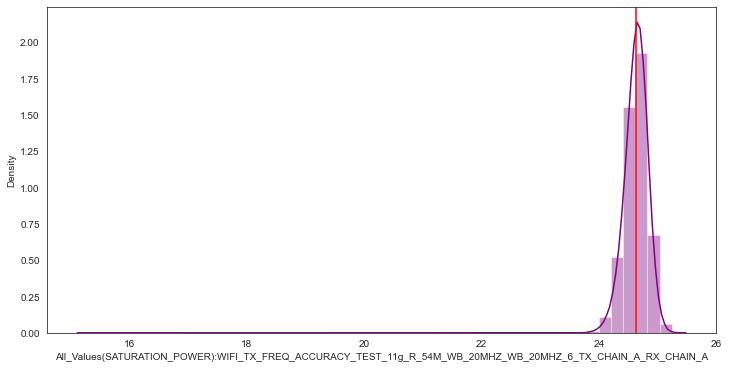

In [243]:
sns.set_style("white")
plt.figure(figsize=(12,6))
sns.distplot(wifi_tx_freq_test['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A'],color='purple',bins=50)
plt.axvline(np.mean(wifi_tx_freq_test['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A']), color='r')
plt.show()

In [391]:
wifi_pre_tx_freq_test = df.filter(regex='(DEVICE|WIFI_RX_CURRENT|WIFI_TX_CURRENT)')

In [392]:
print('Number of rows :', wifi_pre_tx_freq_test.shape[0])
print('Number of columns :', wifi_pre_tx_freq_test.shape[1])

Number of rows : 824986
Number of columns : 11


In [393]:
# totrain = df.filter(regex='(WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_A_RX_CHAIN_A)')
totrain = df['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_A_RX_CHAIN_A']
totest = df['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A']

In [394]:
testdf = wifi_pre_tx_freq_test.join(totrain).join(totest).dropna()

In [425]:
# X = testdf[totrain]
X = testdf['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_A_RX_CHAIN_A']
y = testdf['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A']

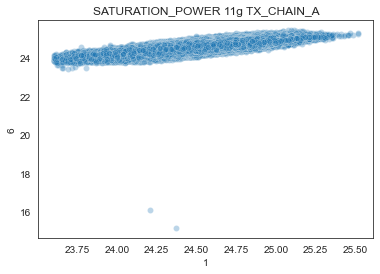

In [412]:
sns.scatterplot(x=X, y=y, alpha=0.3);
plt.xlabel("1")
plt.ylabel("6")
plt.title("SATURATION_POWER 11g TX_CHAIN_A")
plt.show()

In [426]:
# Remove outliers
index = y.index[y < 23.6]
y.drop(index, inplace=True)
X.drop(index, inplace=True)

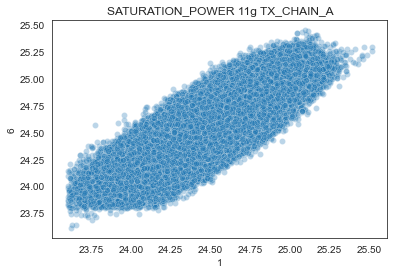

In [427]:
sns.scatterplot(x=X, y=y, alpha=0.3);
plt.xlabel("1")
plt.ylabel("6")
plt.title("SATURATION_POWER 11g TX_CHAIN_A")
plt.show()

In [436]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [460]:
y_train.shape, y_test.shape

((655498,), (163875,))

In [437]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Standardization
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.to_frame())
X_test = scaler.transform(X_test.to_frame())

# mae = np.mean(abs((pred - y_test)))
# print('Mean Absolute Error = ', mae)
# mse = np.mean((pred - y_test)**2)
# print('Mean Squared Error = ', mse)

# Build some models and check them against training data using MAE, RMSE and R2
models = [LinearRegression(), KNeighborsRegressor(), Ridge()]
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_test, predictions))
    print("    RMSE", np.sqrt(mean_squared_error(y_test, predictions)))
    print("    R2", r2_score(y_test, predictions))

# calculating coefficients
# coeff = pd.DataFrame(X_train.columns)
# coeff['Coefficient Estimate'] = pd.Series(model.coef_)
# print(coeff)

LinearRegression
    MAE 0.09315703319825441
    RMSE 0.11731033198108416
    R2 0.6427054773700585
KNeighborsRegressor
    MAE 0.10193913653699464
    RMSE 0.1282353937997417
    R2 0.5730572427721362
Ridge
    MAE 0.09315702703956791
    RMSE 0.11731033095250862
    R2 0.6427054836355665


In [438]:
y.describe()

count    819373.000000
mean         24.632374
std           0.196395
min          23.613000
25%          24.511000
50%          24.644000
75%          24.766000
max          25.445000
Name: All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A, dtype: float64

In [439]:
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

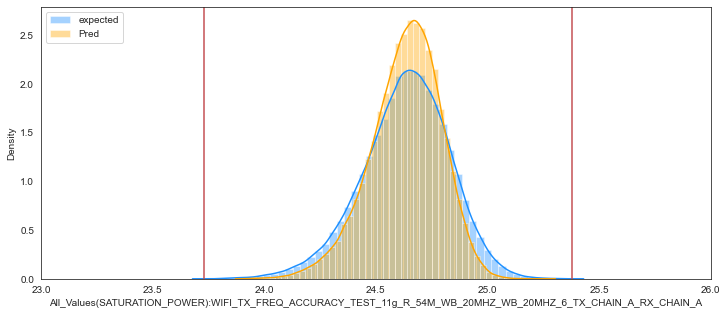

In [441]:
sns.set_style("white")
# Plot
plt.figure(figsize=(12,5))
sns.distplot(y_test, color="dodgerblue", label="expected")
sns.distplot(y_test_pred, color="orange", label="Pred")
plt.axvline(np.min(y_test), color='r')
plt.axvline(np.max(y_test), color='r')
plt.xlim(23,26)
plt.legend(loc = "upper left");
plt.show()

In [448]:
print("Range of Actual Min VS Actual Max %0.2f - %0.2f" % (np.min(y_test), np.max(y_test)))
print("Range of Expected Min VS Expected Max %0.2f - %0.2f" % (np.min(y_test_pred), np.max(y_test_pred)))

Range of Actual Min VS Actual Max 23.73 - 25.38
Range of Expected Min VS Expected Max 23.91 - 25.26


In [454]:
np.std(y_test), np.std(y_test_pred)

(0.19625606397902765, 0.15783826389453326)

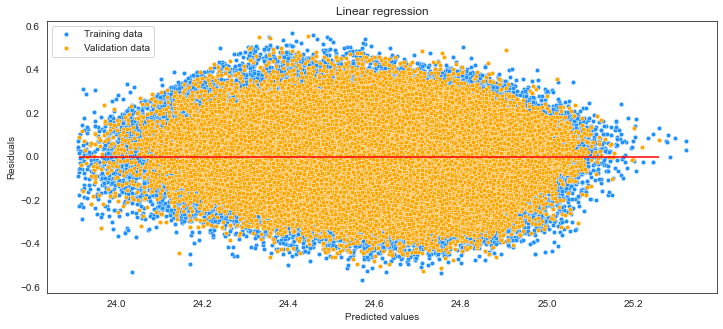

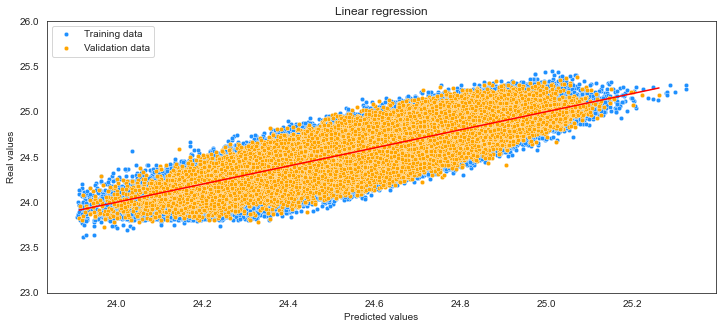

In [455]:
# Plot residuals 
plt.figure(figsize=(12,5))
sns.scatterplot(x = y_train_pred,y = y_train_pred - y_train, color = "dodgerblue", s=20, label = "Training data")
sns.scatterplot(x = y_test_pred,y = y_test_pred - y_test, color = "orange", s=20, label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.hlines(y = 0, xmin = np.min(y_test_pred), xmax = np.max(y_test_pred), color = "red")
plt.legend(loc = "upper left")
plt.show()

# Plot predictions
plt.figure(figsize=(12,5))
sns.scatterplot(x = y_train_pred,y = y_train, color = "dodgerblue", s=20, label = "Training data")
sns.scatterplot(x = y_test_pred,y = y_test, color = "orange", s=20, label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.plot([np.min(y_test_pred), np.max(y_test_pred)], [np.min(y_test_pred), np.max(y_test_pred)], c = "red")
plt.legend(loc = "upper left")
plt.ylim(23,26)
plt.show()

In [456]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

# Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())

Best alpha : 0.6
Try again for more precision with alphas centered around 0.6
Best alpha : 0.84
Ridge RMSE on Training set : 0.11701821151852947
Ridge RMSE on Test set : 0.11730965609500563


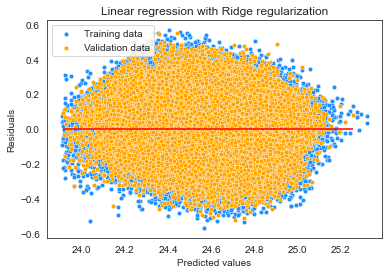

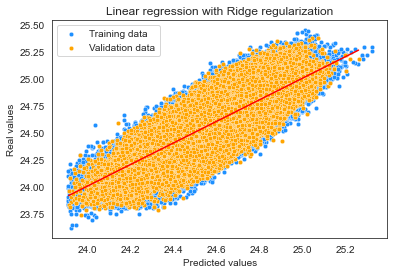

In [457]:
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

sns.scatterplot(x = y_train_rdg,y = y_train_rdg - y_train, color = "dodgerblue", s=20, label = "Training data")
sns.scatterplot(x = y_test_rdg,y = y_test_rdg - y_test, color = "orange", s=20, label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.hlines(y = 0, xmin = np.min(y_test_rdg), xmax = np.max(y_test_rdg), color = "red")
plt.legend(loc = "upper left")
plt.show()

sns.scatterplot(x = y_train_rdg,y = y_train, color = "dodgerblue", s=20, label = "Training data")
sns.scatterplot(x = y_test_rdg,y = y_test, color = "orange", s=20, label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.plot([np.min(y_test_rdg), np.max(y_test_rdg)], [np.min(y_test_rdg), np.max(y_test_rdg)], c = "red")
plt.legend(loc = "upper left")
plt.show()

**Target variable distribution - PPM Band: 11g - TX_CHAIN_A, Channel:6**

In [462]:
totrain = df['All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_A_RX_CHAIN_A']
totest = df['All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A']

In [463]:
testdf = wifi_pre_tx_freq_test.join(totrain).join(totest).dropna()

In [464]:
# X = testdf[totrain]
X = testdf['All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_A_RX_CHAIN_A']
y = testdf['All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_A_RX_CHAIN_A']

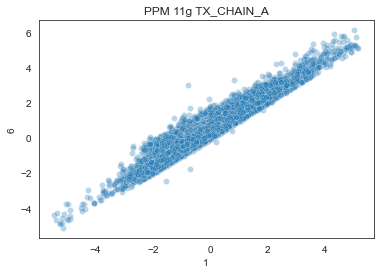

In [465]:
sns.scatterplot(x=X, y=y, alpha=0.3);
plt.xlabel("1")
plt.ylabel("6")
plt.title("PPM 11g TX_CHAIN_A")
plt.show()

In [466]:
# Remove outliers
index = y.index[y > 5.5]
y.drop(index, inplace=True)
X.drop(index, inplace=True)

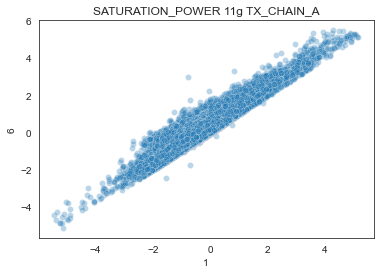

In [467]:
sns.scatterplot(x=X, y=y, alpha=0.3);
plt.xlabel("1")
plt.ylabel("6")
plt.title("PPM 11g TX_CHAIN_A")
plt.show()

In [468]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [469]:
y_train.shape, y_test.shape

((655498,), (163875,))

In [470]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.to_frame())
X_test = scaler.transform(X_test.to_frame())

# Build some models and check them against training data using MAE, RMSE and R2
models = [LinearRegression(), KNeighborsRegressor(), Ridge()]
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(type(model).__name__)
    print("    MAE", mean_absolute_error(y_test, predictions))
    print("    RMSE", np.sqrt(mean_squared_error(y_test, predictions)))
    print("    R2", r2_score(y_test, predictions))

LinearRegression
    MAE 0.1983012202476557
    RMSE 0.24632016892445738
    R2 0.5641602446441976
KNeighborsRegressor
    MAE 0.2082121299771167
    RMSE 0.26253090801855994
    R2 0.5049058714128097
Ridge
    MAE 0.19830117113932264
    RMSE 0.24632016726532274
    R2 0.5641602505155547


In [472]:
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("    MAE", mean_absolute_error(y_test, y_test_pred))
print("    RMSE", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("    R2", r2_score(y_test, predictions))

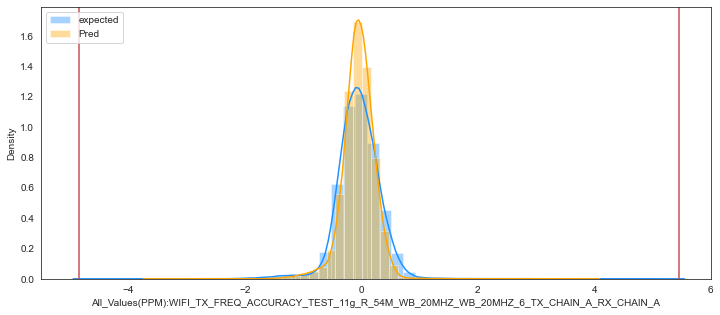

In [474]:
sns.set_style("white")
# Plot
plt.figure(figsize=(12,5))
sns.distplot(y_test, color="dodgerblue", label="expected")
sns.distplot(y_test_pred, color="orange", label="Pred")
plt.axvline(np.min(y_test), color='r')
plt.axvline(np.max(y_test), color='r')
plt.xlim(-5.5, 6)
plt.legend(loc = "upper left");
plt.show()

In [475]:
print("Range of Actual Min VS Actual Max %0.2f - %0.2f" % (np.min(y_test), np.max(y_test)))
print("Range of Expected Min VS Expected Max %0.2f - %0.2f" % (np.min(y_test_pred), np.max(y_test_pred)))

Range of Actual Min VS Actual Max -4.85 - 5.45
Range of Expected Min VS Expected Max -3.67 - 4.01


**Target variable distribution - SATURATION_POWER Band: 11g - TX_CHAIN_B, Channel:6**

In [478]:
totrain = df['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_B_RX_CHAIN_A']
totest = df['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_B_RX_CHAIN_A']

In [479]:
testdf = wifi_pre_tx_freq_test.join(totrain).join(totest).dropna()

In [480]:
# X = testdf[totrain]
X = testdf['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_B_RX_CHAIN_A']
y = testdf['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_B_RX_CHAIN_A']

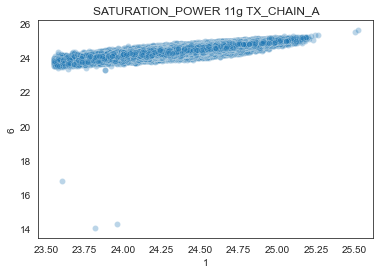

In [481]:
sns.scatterplot(x=X, y=y, alpha=0.3);
plt.xlabel("1")
plt.ylabel("6")
plt.title("SATURATION_POWER 11g TX_CHAIN_B")
plt.show()

In [482]:
# Remove outliers
index = y.index[y < 23.6]
y.drop(index, inplace=True)
X.drop(index, inplace=True)

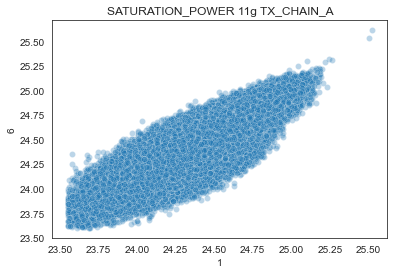

In [483]:
sns.scatterplot(x=X, y=y, alpha=0.3);
plt.xlabel("1")
plt.ylabel("6")
plt.title("SATURATION_POWER 11g TX_CHAIN_B")
plt.show()

In [484]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [485]:
y_train.shape, y_test.shape

((655422,), (163856,))

In [486]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.to_frame())
X_test = scaler.transform(X_test.to_frame())

In [487]:
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("    MAE", mean_absolute_error(y_test, y_test_pred))
print("    RMSE", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("    R2", r2_score(y_test, predictions))

In [489]:
print("Range of Actual Min VS Actual Max %0.2f - %0.2f" % (np.min(y_test), np.max(y_test)))
print("Range of Expected Min VS Expected Max %0.2f - %0.2f" % (np.min(y_test_pred), np.max(y_test_pred)))

Range of Actual Min VS Actual Max 23.60 - 25.32
Range of Expected Min VS Expected Max 23.79 - 25.08


**Target variable distribution - PPM Band: 11g - TX_CHAIN_B, Channel:6**

In [490]:
totrain = df['All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_B_RX_CHAIN_A']
totest = df['All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_B_RX_CHAIN_A']

In [491]:
testdf = wifi_pre_tx_freq_test.join(totrain).join(totest).dropna()

In [499]:
# X = testdf[totrain]
X = testdf['All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_1_TX_CHAIN_B_RX_CHAIN_A']
y = testdf['All_Values(PPM):WIFI_TX_FREQ_ACCURACY_TEST_11g_R_54M_WB_20MHZ_WB_20MHZ_6_TX_CHAIN_B_RX_CHAIN_A']

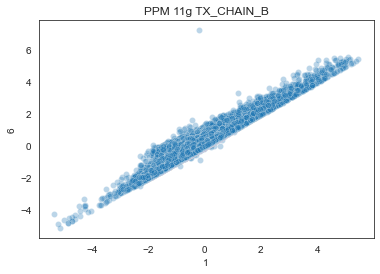

In [494]:
sns.scatterplot(x=X, y=y, alpha=0.3);
plt.xlabel("1")
plt.ylabel("6")
plt.title("PPM 11g TX_CHAIN_B")
plt.show()

In [500]:
# Remove outliers
index = y.index[y > 5.5]
y.drop(index, inplace=True)
X.drop(index, inplace=True)

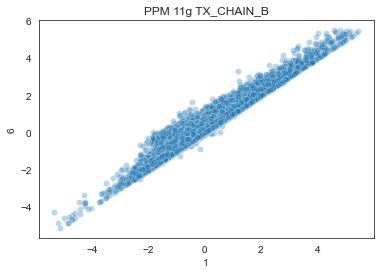

In [501]:
sns.scatterplot(x=X, y=y, alpha=0.3);
plt.xlabel("1")
plt.ylabel("6")
plt.title("PPM 11g TX_CHAIN_B")
plt.show()

In [502]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [503]:
y_train.shape, y_test.shape

((655467,), (163867,))

In [504]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.to_frame())
X_test = scaler.transform(X_test.to_frame())

In [505]:
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("    MAE", mean_absolute_error(y_test, y_test_pred))
print("    RMSE", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("    R2", r2_score(y_test, predictions))

In [506]:
print("Range of Actual Min VS Actual Max %0.2f - %0.2f" % (np.min(y_test), np.max(y_test)))
print("Range of Expected Min VS Expected Max %0.2f - %0.2f" % (np.min(y_test_pred), np.max(y_test_pred)))

Range of Actual Min VS Actual Max -4.87 - 5.45
Range of Expected Min VS Expected Max -4.21 - 4.60


**Target: Band: 11a - TX_CHAIN_A, Channel: 52, 64, 100**

In [552]:
totrain = df['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_36_TX_CHAIN_A_RX_CHAIN_A']
totest_52 = df['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_52_TX_CHAIN_A_RX_CHAIN_A']
totest_64 = df['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_64_TX_CHAIN_A_RX_CHAIN_A']
totest_100 = df['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_100_TX_CHAIN_A_RX_CHAIN_A']

In [553]:
testdf_52 = wifi_pre_tx_freq_test.join(totrain).join(totest_52).dropna()
testdf_64 = wifi_pre_tx_freq_test.join(totrain).join(totest_64).dropna()
testdf_100 = wifi_pre_tx_freq_test.join(totrain).join(totest_100).dropna()

In [554]:
X_52 = testdf_52['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_36_TX_CHAIN_A_RX_CHAIN_A']
X_64 = testdf_64['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_36_TX_CHAIN_A_RX_CHAIN_A']
X_100 = testdf_100['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_36_TX_CHAIN_A_RX_CHAIN_A']

y_52 = testdf_52['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_52_TX_CHAIN_A_RX_CHAIN_A']
y_64 = testdf_64['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_64_TX_CHAIN_A_RX_CHAIN_A']
y_100 = testdf_100['All_Values(SATURATION_POWER):WIFI_TX_FREQ_ACCURACY_TEST_11a_R_54M_WB_20MHZ_WB_20MHZ_100_TX_CHAIN_A_RX_CHAIN_A']

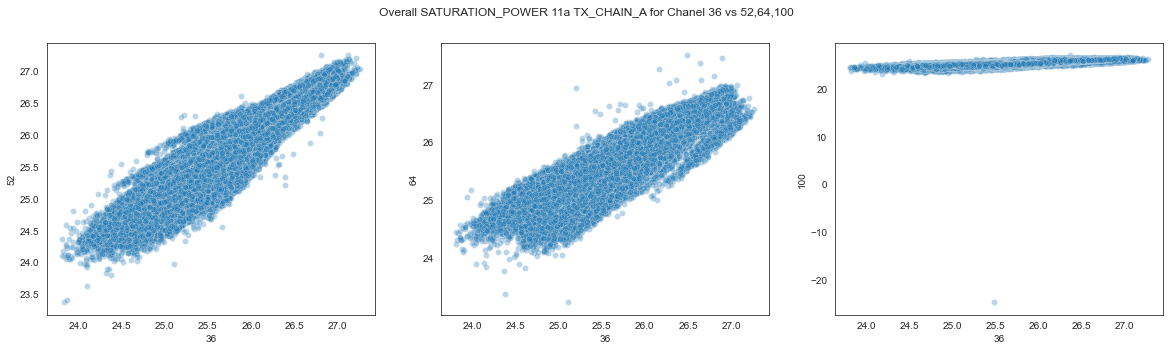

In [536]:
plt.figure(figsize=(20,5)) 
plt.subplot(1,3,1)
sns.scatterplot(x=X_52, y=y_52, alpha=0.3);
plt.xlabel("36")
plt.ylabel("52")

plt.subplot(1,3,2)
sns.scatterplot(x=X_64, y=y_64, alpha=0.3);
plt.xlabel("36")
plt.ylabel("64")

plt.subplot(1,3,3)
sns.scatterplot(x=X_100, y=y_100, alpha=0.3);
plt.xlabel("36")
plt.ylabel("100")

plt.suptitle("Overall SATURATION_POWER 11a TX_CHAIN_A for Chanel 36 vs 52,64,100")
plt.show()

In [537]:
# Remove outliers
index = y_100.index[y_100 < -20]
y_100.drop(index, inplace=True)
X_100.drop(index, inplace=True)

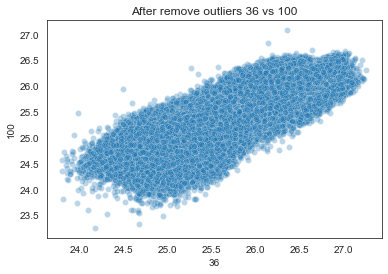

In [542]:
sns.scatterplot(x=X_100, y=y_100, alpha=0.3);
plt.xlabel("36")
plt.ylabel("100")
plt.title("After remove outliers 36 vs 100")
plt.show()

In [559]:
# Channel 52
X_train, X_test, y_train, y_test = train_test_split(X_52, y_52, test_size=0.2, random_state = 0)

In [560]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.to_frame())
X_test = scaler.transform(X_test.to_frame())

In [561]:
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("    MAE", mean_absolute_error(y_test, y_test_pred))
print("    RMSE", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("    R2", r2_score(y_test, predictions))

    MAE 0.12073416034157061
    RMSE 0.15633040679062185
    R2 0.8220959035092033


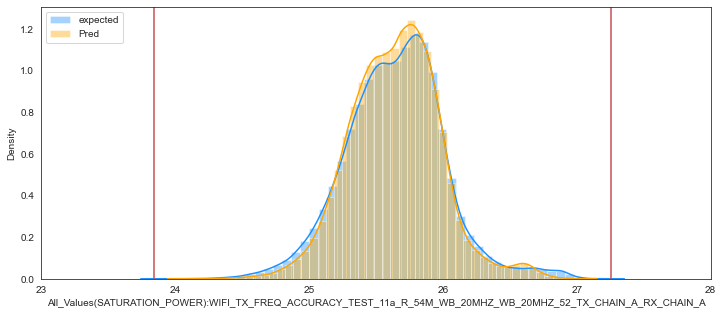

In [547]:
sns.set_style("white")
# Plot
plt.figure(figsize=(12,5))
sns.distplot(y_test, color="dodgerblue", label="expected")
sns.distplot(y_test_pred, color="orange", label="Pred")
plt.axvline(np.min(y_test), color='r')
plt.axvline(np.max(y_test), color='r')
plt.xlim(23,28)
plt.legend(loc = "upper left");
plt.show()

In [548]:
print("Range of Actual Min VS Actual Max %0.2f - %0.2f" % (np.min(y_test), np.max(y_test)))
print("Range of Expected Min VS Expected Max %0.2f - %0.2f" % (np.min(y_test_pred), np.max(y_test_pred)))

Range of Actual Min VS Actual Max 23.84 - 27.25
Range of Expected Min VS Expected Max 24.03 - 27.06


In [562]:
# Channel 64
X_train, X_test, y_train, y_test = train_test_split(X_64, y_64, test_size=0.2, random_state = 0)

In [563]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.to_frame())
X_test = scaler.transform(X_test.to_frame())

In [564]:
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("    MAE", mean_absolute_error(y_test, y_test_pred))
print("    RMSE", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("    R2", r2_score(y_test, y_test_pred))

    MAE 0.154970921841257
    RMSE 0.19606672225606236
    R2 0.6138640617886562


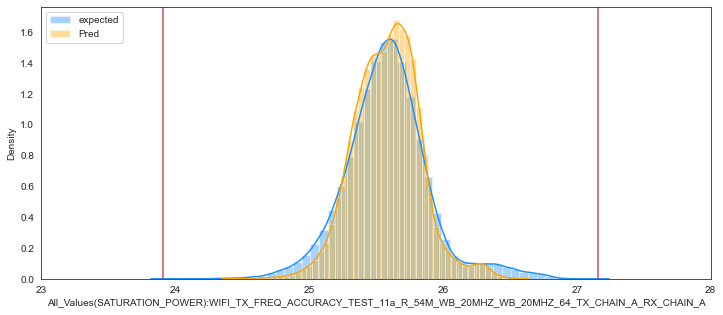

In [565]:
sns.set_style("white")
# Plot
plt.figure(figsize=(12,5))
sns.distplot(y_test, color="dodgerblue", label="expected")
sns.distplot(y_test_pred, color="orange", label="Pred")
plt.axvline(np.min(y_test), color='r')
plt.axvline(np.max(y_test), color='r')
plt.xlim(23,28)
plt.legend(loc = "upper left");
plt.show()

In [566]:
print("Range of Actual Min VS Actual Max %0.2f - %0.2f" % (np.min(y_test), np.max(y_test)))
print("Range of Expected Min VS Expected Max %0.2f - %0.2f" % (np.min(y_test_pred), np.max(y_test_pred)))

Range of Actual Min VS Actual Max 23.91 - 27.16
Range of Expected Min VS Expected Max 24.42 - 26.57


In [567]:
# Channel 100
X_train, X_test, y_train, y_test = train_test_split(X_100, y_100, test_size=0.2, random_state = 0)

In [568]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.to_frame())
X_test = scaler.transform(X_test.to_frame())

In [569]:
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("    MAE", mean_absolute_error(y_test, y_test_pred))
print("    RMSE", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("    R2", r2_score(y_test, y_test_pred))

    MAE 0.17337624150748268
    RMSE 0.2214442677905149
    R2 0.5312861517061924


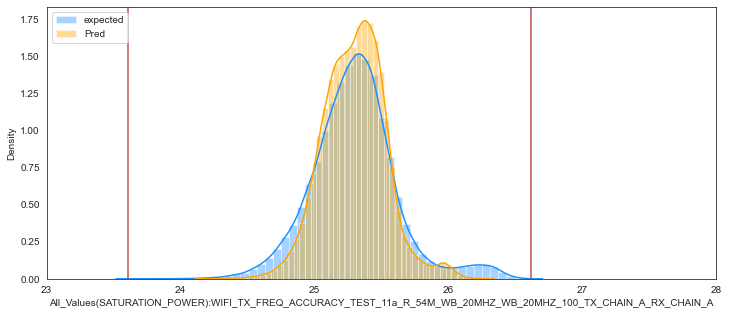

In [570]:
sns.set_style("white")
# Plot
plt.figure(figsize=(12,5))
sns.distplot(y_test, color="dodgerblue", label="expected")
sns.distplot(y_test_pred, color="orange", label="Pred")
plt.axvline(np.min(y_test), color='r')
plt.axvline(np.max(y_test), color='r')
plt.xlim(23,28)
plt.legend(loc = "upper left");
plt.show()

In [571]:
print("Range of Actual Min VS Actual Max %0.2f - %0.2f" % (np.min(y_test), np.max(y_test)))
print("Range of Expected Min VS Expected Max %0.2f - %0.2f" % (np.min(y_test_pred), np.max(y_test_pred)))

Range of Actual Min VS Actual Max 23.60 - 26.61
Range of Expected Min VS Expected Max 24.17 - 26.27
